# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
from math import floor 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import config

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
#getting api_key fron config.py file 
result = []
api_key = config.api_key
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial" +"&appid=" + api_key + "&q="

In [4]:
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
lat_json = []
long_json = []
country = []
city_json = []


record_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")


for city in cities:
    try:
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        print(f"{url}{city}")
    
        response = requests.get(f"{url}{city}").json()
        
        #append respond results into lists 
        city_json.append(response['name'])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response['main']['humidity'])
        lat_json.append(response["coord"]["lat"])
        long_json.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])

        # Increase record counter in a set by one 
        record_counter += 1
        
        #seset the counter if >= 49 and increase set number as well 
        if(record_counter >= 50):
            record_counter = 0
            set_counter =  set_counter + 1
            time.sleep(61)
            print()
            print("-----------------------------")
            
    except:
        print("City not found. Skipping...")
        record_counter += 1
    
    continue

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f15ec960836aac69020270634ec77baa&q=barcelos
Processing Record 1 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f15ec960836aac69020270634ec77baa&q=hobart
Processing Record 2 of Set 1 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f15ec960836aac69020270634ec77baa&q=iqaluit
Processing Record 3 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f15ec960836aac69020270634ec77baa&q=hermanus
Processing Record 4 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f15ec960836aac69020270634ec77baa&q=atuona
Processing Record 5 of Set 1 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f15ec960836aac69020270634ec77baa&q=torbay
Processing Record 6 of Set 1 | moron
http://api

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#create output dictionary
out_data = {"City": city_json,"Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity": humidity,
    "Lat":lat_json,  "Lng":long_json,  "Max Temp": max_temp, "Wind Speed": wind_speed}

#create weather dataframe
weather_dataframe = pd.DataFrame(out_data)

# save data into csv file 
weather_dataframe.to_csv("output_data/cities.csv")
weather_dataframe.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [17]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barcelos,0,PT,1547008200,77,41.53,-8.62,41.00,3.36
1,Hobart,0,AU,1547010000,51,-42.88,147.33,64.40,17.22
2,Iqaluit,90,CA,1547010000,68,63.75,-68.52,-20.21,2.24
3,Hermanus,76,ZA,1547011346,95,-34.42,19.24,64.02,4.27
4,Atuona,68,PF,1547011347,100,-9.80,-139.03,81.12,15.19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

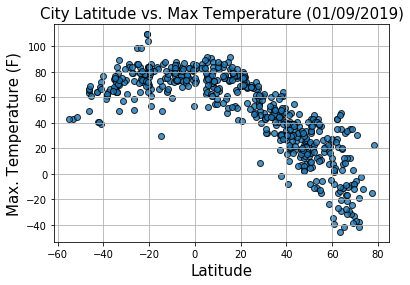

In [32]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], edgecolor = 'black', alpha= 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (01/09/2019)", size = 15)
plt.ylabel("Max. Temperature (F)", size = 15)
plt.xlabel("Latitude", size = 15)
plt.grid(True)

#Save figure
plt.savefig("output_plot/Max_Temp_vs_Latitude.png")

#### Latitude vs. Humidity Plot

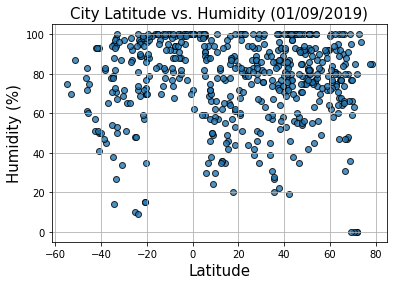

In [33]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], edgecolor = 'black', alpha= 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/09/2019)", size = 15)
plt.ylabel("Humidity (%)", size = 15)
plt.xlabel("Latitude", size = 15)
plt.grid(True)

#Save figure
plt.savefig("output_plot/Humidity_vs_Latitude.png")

#### Latitude vs. Cloudiness Plot

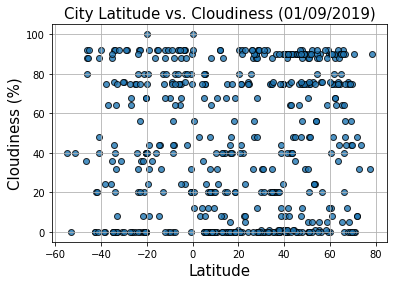

In [34]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], edgecolor = 'black', alpha= 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/09/2019)", size = 15)
plt.ylabel("Cloudiness (%)", size = 15)
plt.xlabel("Latitude", size = 15)
plt.grid(True)

#Save figure
plt.savefig("output_plot/Cloudiness_vs_Latitude.png")

#### Latitude vs. Wind Speed Plot

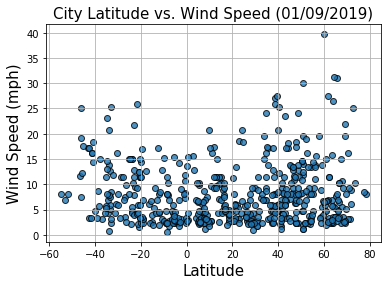

In [35]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], edgecolor = 'black', alpha= 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/09/2019)", size = 15)
plt.ylabel("Wind Speed (mph)", size = 15)
plt.xlabel("Latitude", size = 15)
plt.grid(True)

#Save figure
plt.savefig("output_plot/Wind_Speed_vs_Latitude.png")